# Лаба 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# функции тестирования
%%writefile test_score.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
  ys = np.loadtxt("ys.csv", delimiter=",")
  return(ys)

@pytest.fixture()
def load_approx():
  approx = np.loadtxt("approx.csv", delimiter=",")
  return(approx)

def test_mse(load_ys, load_approx):
  assert mean_squared_error(load_ys, load_approx) < 1

def test_r2(load_ys, load_approx):
  assert r2_score(load_ys, load_approx) > 0.9

Overwriting test_score.py


## 1-й датасет (+обучение)

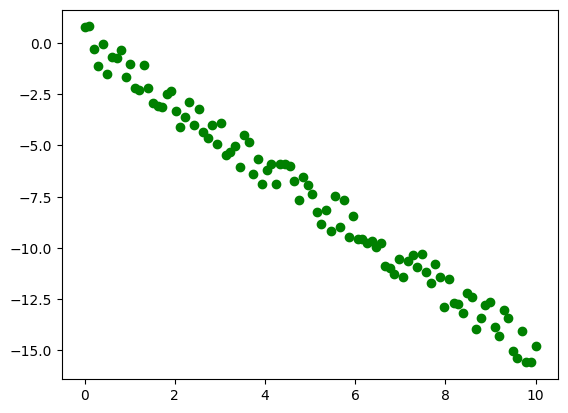

In [3]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1

plt.scatter(xs,ys, c='green')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(xs.reshape(-1,1), ys)
approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

mean_squared_error: 0.36
coefficient of determination: 0.98
coefficients:  [-1.51098357]


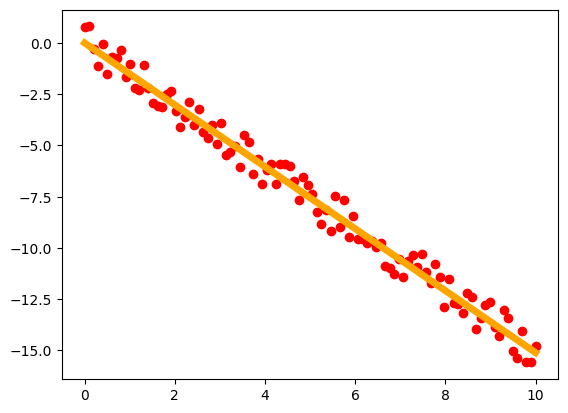

In [5]:
plt.scatter(xs,ys, c='red')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [6]:
# тестирую 1-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse PASSED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

============================== 2 passed in 1.15s ===============================


Все тесты выполнены успешно, следовательно, качество предсказания удовлетворительное.

## 2-й датасет

mean_squared_error: 2.10
coefficient of determination: 0.90
coefficients:  [-1.51098357]


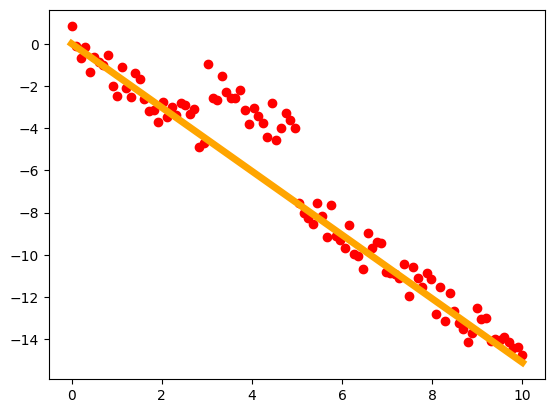

In [10]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1
ys[30:50] += 3    # шум

approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

plt.scatter(xs,ys, c='red')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [11]:
# тестирую 2-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = array([  0.81743388,  -0.12470833,  -0.69131118,  -0.13662507,
        -1.3329492 ,  -0.64385452,  -0.87406553,  -1.00...-14.06722912, -14.00073904, -14.03793699, -13.89498998,
       -14.15570633, -14.43896682, -14.36260668, -14.75621237])
load_approx = array([ 5.13181105e-03, -1.47492792e-01, -3.00117395e-01, -4.52741998e-01,
       -6.05366602e-01, -7.579

Не все тесты выполнены успешно, следовательно, качество предсказания неудовлетворительное.

## 3-й датасет

mean_squared_error: 1.30
coefficient of determination: 0.95
coefficients:  [-1.51098357]


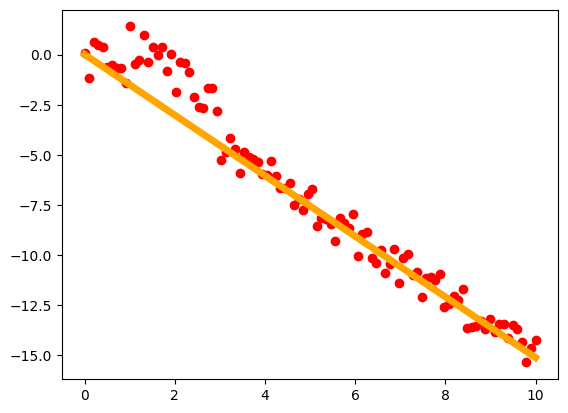

In [17]:
xs = np.linspace(0,10,100)
ys = -1.5 * xs + np.random.random(100)*2 -1
ys[10:30] += 2    # шум

approx = reg.predict(xs.reshape(-1,1))
print("mean_squared_error: %.2f" % mean_squared_error(ys, approx))
print("coefficient of determination: %.2f" % r2_score(ys, approx))
print("coefficients: ", reg.coef_)

plt.scatter(xs,ys, c='red')
plt.plot(xs.reshape(-1,1), approx, color="orange", linewidth=5)
plt.show()
np.savetxt("ys.csv", ys, delimiter=",")
np.savetxt("approx.csv", approx, delimiter=",")

In [18]:
# тестирую 3-й датасет
!pytest -v test_score.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 2 items                                                              

test_score.py::test_mse FAILED                                           [ 50%]
test_score.py::test_r2 PASSED                                            [100%]

=================================== FAILURES ===================================
___________________________________ test_mse ___________________________________

load_ys = array([  0.08410617,  -1.14914501,   0.61900383,   0.50137756,
         0.38030144,  -0.64001917,  -0.53155727,  -0.66...-13.41523208, -14.13817537, -13.49080274, -13.66285848,
       -14.33346145, -15.35010973, -14.65128248, -14.20569276])
load_approx = array([ 5.13181105e-03, -1.47492792e-01, -3.00117395e-01, -4.52741998e-01,
       -6.05366602e-01, -7.579

Не все тесты выполнены успешно, следовательно, качество предсказания неудовлетворительное.

## просто тест 1

In [ ]:
%%writefile test.py
import pytest

def test_err():
  assert 1 == 10

def test_ok():
  assert 1 == 1

Overwriting test.py


In [ ]:
!cat test.py

import pytest

def test_err():
  assert 1 == 10

def test_ok():
  assert 1 == 1


In [ ]:
!pytest -v test.py

## просто тест 2

In [ ]:
!mkdir test_module

mkdir: cannot create directory ‘test_module’: File exists


In [ ]:
%%writefile test_module/test_unit.py
import unittest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class TestMethods(unittest.TestCase):

  def test_upper(self):
    self.assertEqual("foo".upper(), "FOO")

  def test_mse(self):
    ys = np.loadtxt("ys.csv", delimiter=",")
    approx = np.loadtxt("approx.csv", delimiter=",")
    self.assertTrue(mean_squared_error(ys,approx) < 1)

if __name__ == '__main__':
  unittest.main()

In [ ]:
!python -m unittest test_module/test_unit.py